In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\flood prediction\imputated weather dataset.csv")
df.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,Barisal,1949.0,1.0,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-01,0.0
1,Barisal,1949.0,2.0,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-02,0.0
2,Barisal,1949.0,3.0,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-03,0.0
3,Barisal,1949.0,4.0,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-04,0.0
4,Barisal,1949.0,5.0,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-05,0.0


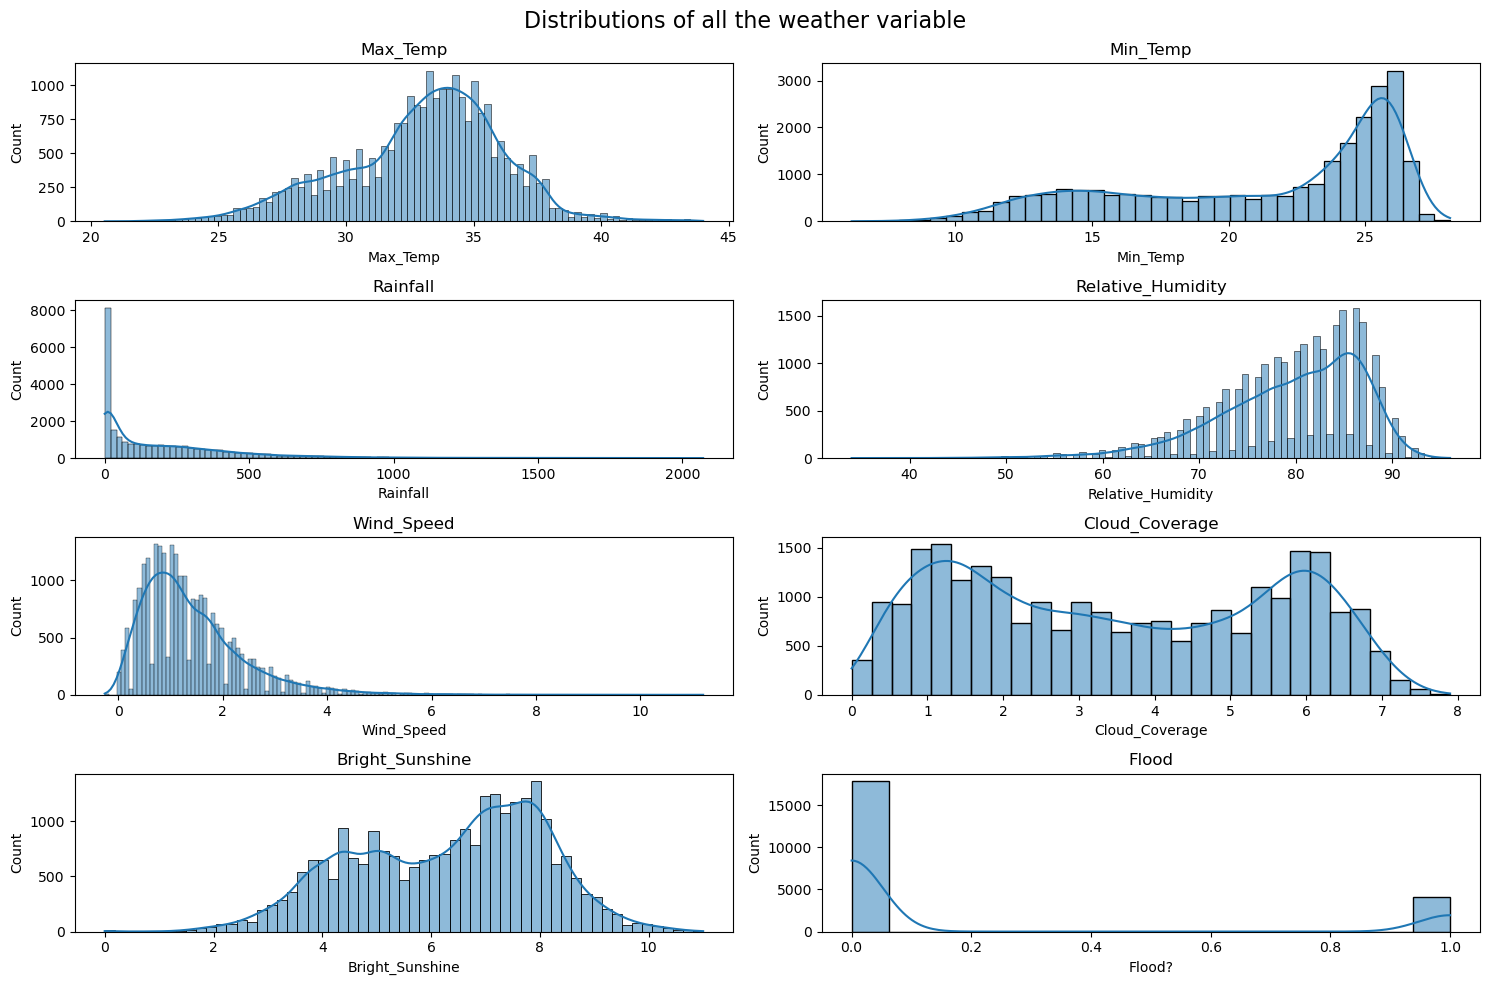

In [3]:
# Create subplots (4 rows x 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle('Distributions of all the weather variable', fontsize=16)

# Plot each distribution separately
sns.histplot(df['Max_Temp'], kde=True, ax=axes[0, 0]).set_title('Max_Temp')
sns.histplot(df['Min_Temp'], kde=True, ax=axes[0, 1]).set_title('Min_Temp')

sns.histplot(df['Rainfall'], kde=True, ax=axes[1, 0]).set_title('Rainfall')
sns.histplot(df['Relative_Humidity'], kde=True, ax=axes[1, 1]).set_title('Relative_Humidity')

sns.histplot(df['Wind_Speed'], kde=True, ax=axes[2, 0]).set_title('Wind_Speed')
sns.histplot(df['Cloud_Coverage'], kde=True, ax=axes[2, 1]).set_title('Cloud_Coverage')

sns.histplot(df['Bright_Sunshine'], kde=True, ax=axes[3, 0]).set_title('Bright_Sunshine')
sns.histplot(df['Flood?'], kde=True, ax=axes[3, 1]).set_title('Flood')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

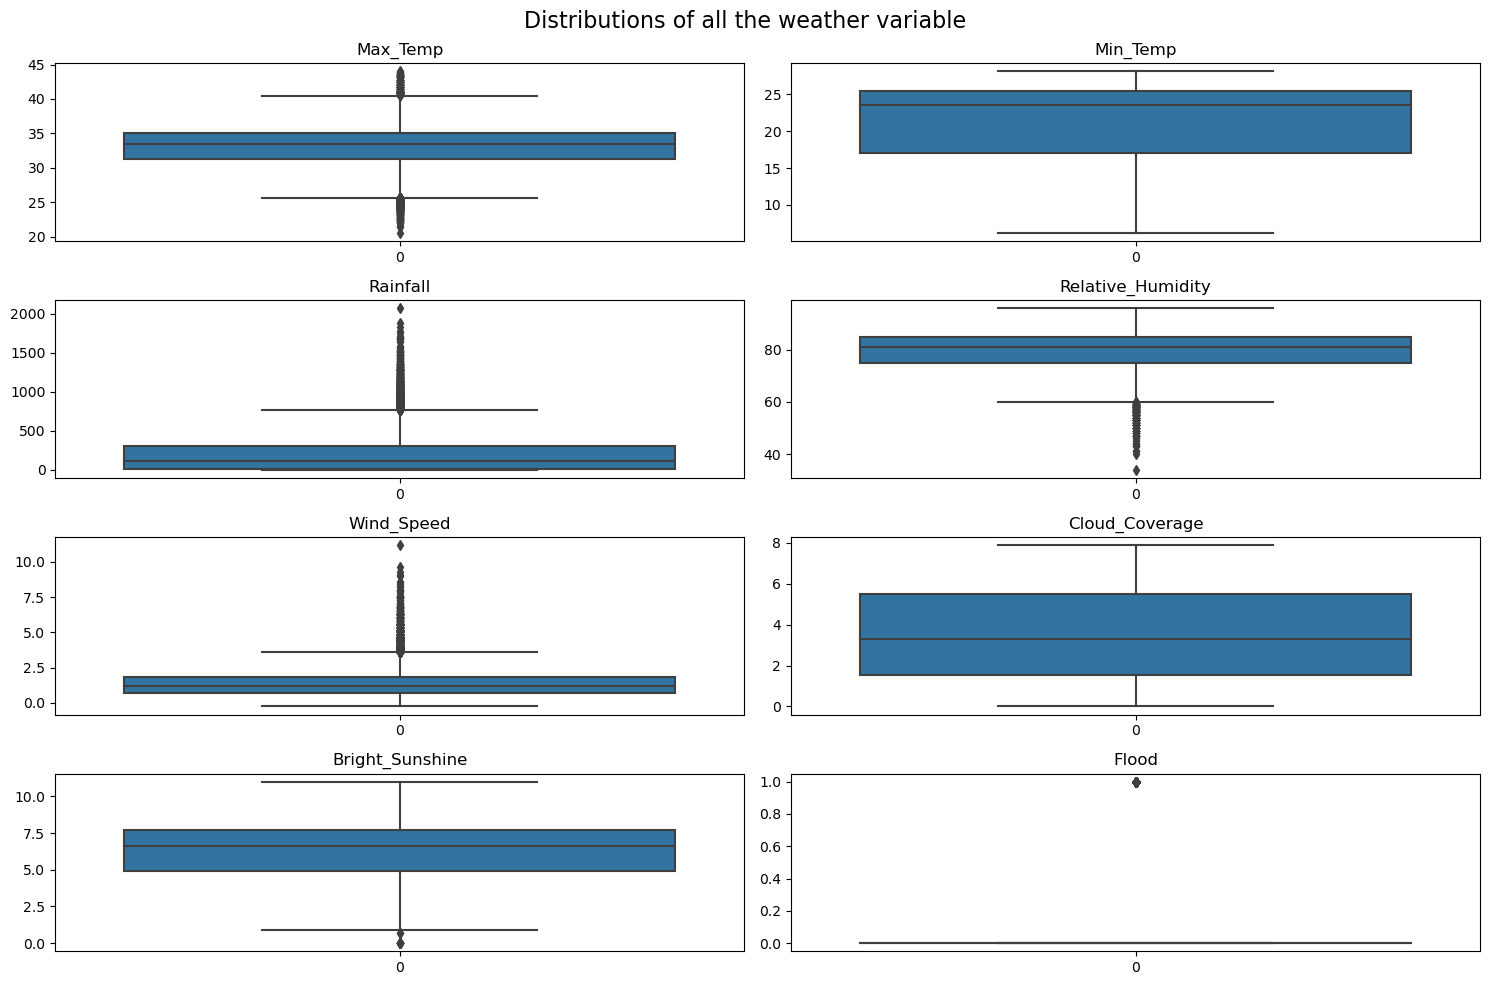

In [4]:
# Create subplots (4 rows x 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle('Distributions of all the weather variable', fontsize=16)

# Plot each distribution separately
sns.boxplot(df['Max_Temp'], ax=axes[0, 0]).set_title('Max_Temp')
sns.boxplot(df['Min_Temp'], ax=axes[0, 1]).set_title('Min_Temp')

sns.boxplot(df['Rainfall'], ax=axes[1, 0]).set_title('Rainfall')
sns.boxplot(df['Relative_Humidity'], ax=axes[1, 1]).set_title('Relative_Humidity')

sns.boxplot(df['Wind_Speed'], ax=axes[2, 0]).set_title('Wind_Speed')
sns.boxplot(df['Cloud_Coverage'], ax=axes[2, 1]).set_title('Cloud_Coverage')

sns.boxplot(df['Bright_Sunshine'], ax=axes[3, 0]).set_title('Bright_Sunshine')
sns.boxplot(df['Flood?'], ax=axes[3, 1]).set_title('Flood')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [5]:
# handling outlier by IQR

independent = ['Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine']
def replace_outliers(df):
    for column in independent:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace small outliers (below lower bound) with the minimum value of the column
        df[column] = df[column].where(df[column] >= lower_bound, df[column].min())
        # Replace large outliers (above upper bound) with the maximum value within the whisker (Q3 + 1.5 * IQR)
        df[column] = df[column].where(df[column] <= upper_bound, upper_bound)

    return df

# Replace outliers
df_handled = replace_outliers(df)

In [6]:
df_handled.describe()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
count,25416.000000,25416.00000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,21960.000000
mean,1991.532578,6.50000,32.976588,21.269254,190.596071,79.265443,1.378047,3.490904,6.321339,41936.105760,546666.993532,573071.413645,23.293928,90.500766,13.039188,0.187113
std,19.827895,3.45212,3.234499,4.948537,215.827990,8.777529,0.879918,2.091392,1.740687,36.540505,122522.702755,137182.613831,1.153441,1.106354,13.486903,0.390011
min,1949.000000,1.00000,20.540000,6.200000,0.000000,34.000000,-0.257010,0.000000,0.000000,41859.000000,0.000000,0.000000,20.870000,88.560000,0.000000,0.000000
25%,1976.000000,3.75000,31.270000,17.000000,7.000000,75.000000,0.700000,1.520000,4.913333,41909.000000,435303.700000,499110.500000,22.500000,89.550000,4.000000,0.000000
50%,1994.000000,6.50000,33.400000,23.500000,109.000000,81.000000,1.200000,3.300000,6.631034,41943.000000,540098.600000,544954.500000,23.010000,90.410000,7.000000,0.000000
75%,2010.000000,9.25000,35.000000,25.500000,309.250000,85.000000,1.855556,5.500000,7.700000,41963.000000,650012.100000,683166.000000,24.150000,91.460000,19.000000,0.000000
max,2022.000000,12.00000,40.595000,28.100000,762.625000,96.000000,3.588889,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.720000,92.260000,63.000000,1.000000


In [7]:
df.describe()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
count,25416.000000,25416.00000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,25416.000000,21960.000000
mean,1991.532578,6.50000,32.976588,21.269254,190.596071,79.265443,1.378047,3.490904,6.321339,41936.105760,546666.993532,573071.413645,23.293928,90.500766,13.039188,0.187113
std,19.827895,3.45212,3.234499,4.948537,215.827990,8.777529,0.879918,2.091392,1.740687,36.540505,122522.702755,137182.613831,1.153441,1.106354,13.486903,0.390011
min,1949.000000,1.00000,20.540000,6.200000,0.000000,34.000000,-0.257010,0.000000,0.000000,41859.000000,0.000000,0.000000,20.870000,88.560000,0.000000,0.000000
25%,1976.000000,3.75000,31.270000,17.000000,7.000000,75.000000,0.700000,1.520000,4.913333,41909.000000,435303.700000,499110.500000,22.500000,89.550000,4.000000,0.000000
50%,1994.000000,6.50000,33.400000,23.500000,109.000000,81.000000,1.200000,3.300000,6.631034,41943.000000,540098.600000,544954.500000,23.010000,90.410000,7.000000,0.000000
75%,2010.000000,9.25000,35.000000,25.500000,309.250000,85.000000,1.855556,5.500000,7.700000,41963.000000,650012.100000,683166.000000,24.150000,91.460000,19.000000,0.000000
max,2022.000000,12.00000,40.595000,28.100000,762.625000,96.000000,3.588889,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.720000,92.260000,63.000000,1.000000


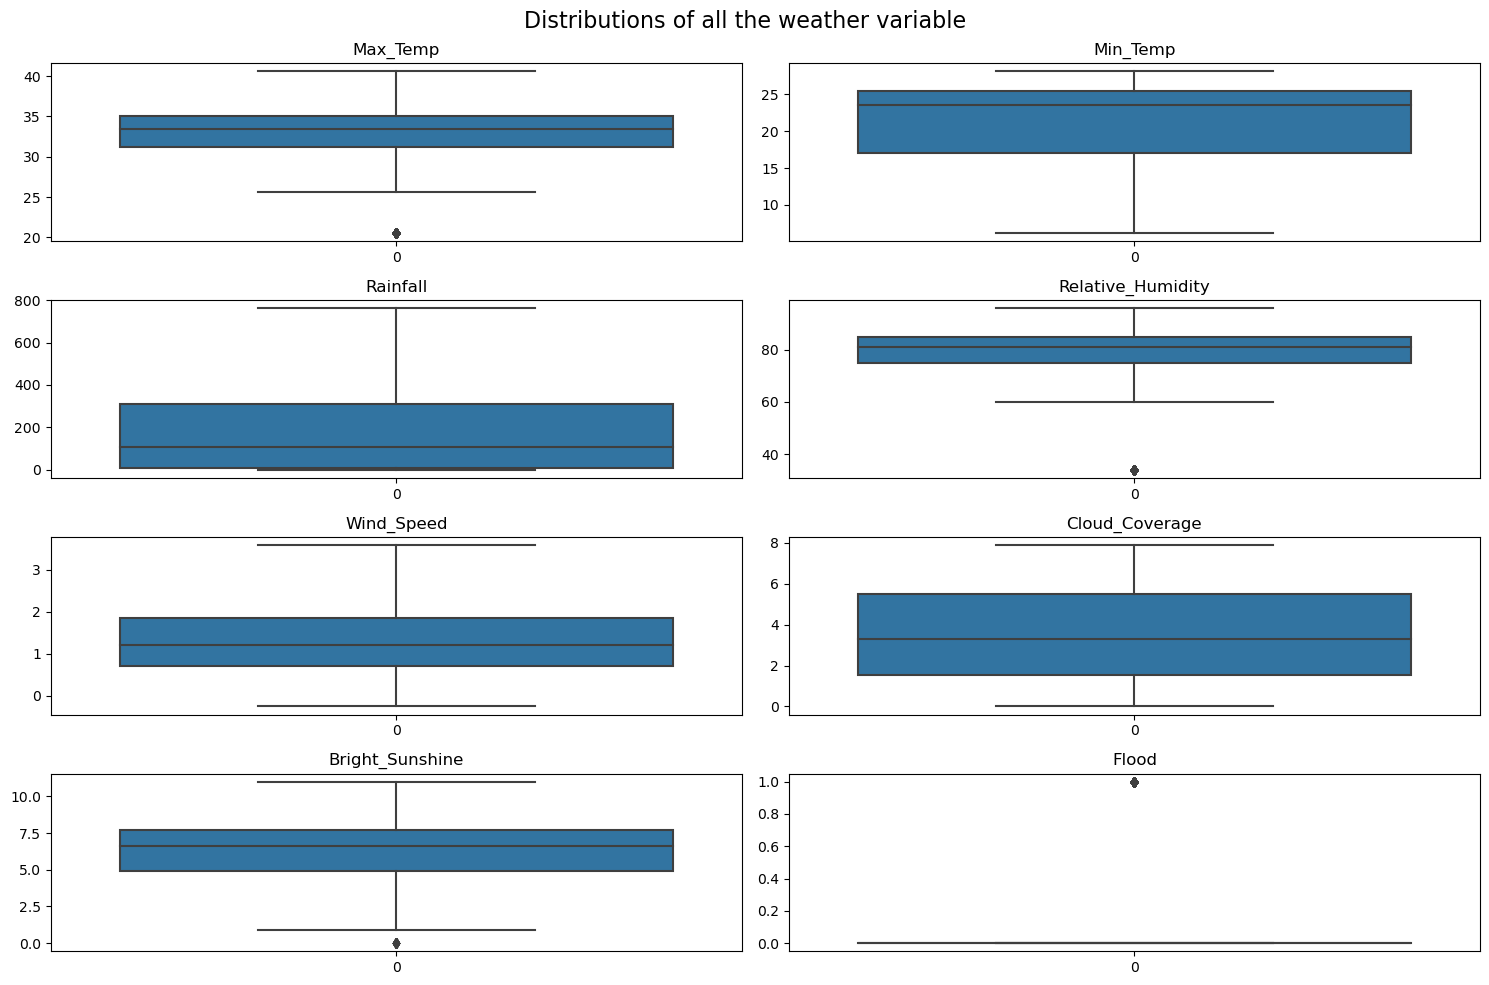

In [8]:
# Create subplots (4 rows x 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle('Distributions of all the weather variable', fontsize=16)

# Plot each distribution separately
sns.boxplot(df_handled['Max_Temp'], ax=axes[0, 0]).set_title('Max_Temp')
sns.boxplot(df_handled['Min_Temp'], ax=axes[0, 1]).set_title('Min_Temp')

sns.boxplot(df_handled['Rainfall'], ax=axes[1, 0]).set_title('Rainfall')
sns.boxplot(df_handled['Relative_Humidity'], ax=axes[1, 1]).set_title('Relative_Humidity')

sns.boxplot(df_handled['Wind_Speed'], ax=axes[2, 0]).set_title('Wind_Speed')
sns.boxplot(df_handled['Cloud_Coverage'], ax=axes[2, 1]).set_title('Cloud_Coverage')

sns.boxplot(df_handled['Bright_Sunshine'], ax=axes[3, 0]).set_title('Bright_Sunshine')
sns.boxplot(df_handled['Flood?'], ax=axes[3, 1]).set_title('Flood')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [9]:
df_handled.to_csv('handling outlier using boxplot.csv', header = True, index = False)